## Import necessary libraries and data

In [1]:
import pandas as pd

path = "data/melb_data.csv"
data = pd.read_csv(path)

In [2]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Drop obvious columns which shouldn't have impact on data

In [4]:
data.drop(['Suburb', 'Address', 'Method', 'SellerG', 'Date', 'Postcode', 'Lattitude', 'Longtitude', 'Propertycount'], axis=1, inplace=True)

In [10]:
data.columns

Index(['Rooms', 'Type', 'Price', 'Distance', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'],
      dtype='object')

In [11]:
data.size

74352

## Drop missing values

In [16]:
data.dropna(inplace=True)

In [17]:
data.size

74352

## Assign independent(X) and dependent(y) variables

In [19]:
y = data.Price
X = data.drop('Price', axis=1, inplace=False)

## Convert non-numerical values

In [20]:
categorical_columns = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_columns)

## Fitting a decision tree model

In [22]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=5)
model.fit(X, y)

DecisionTreeRegressor(random_state=5)

In [23]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Distance  Bedroom2  Bathroom  Car  Landsize  BuildingArea  \
1      2       2.5       2.0       1.0  0.0     156.0          79.0   
2      3       2.5       3.0       2.0  0.0     134.0         150.0   
4      4       2.5       3.0       1.0  2.0     120.0         142.0   
6      3       2.5       4.0       2.0  0.0     245.0         210.0   
7      2       2.5       2.0       1.0  2.0     256.0         107.0   

   YearBuilt  Type_h  Type_t  ...  CouncilArea_Yarra  \
1     1900.0    True   False  ...               True   
2     1900.0    True   False  ...               True   
4     2014.0    True   False  ...               True   
6     1910.0    True   False  ...               True   
7     1890.0    True   False  ...               True   

   CouncilArea_Yarra Ranges  Regionname_Eastern Metropolitan  \
1                     False                            False   
2                     False                            False 

In [24]:
y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

In [25]:
model

DecisionTreeRegressor(random_state=5)

# Exploratory Data Analysis (EDA)

In [26]:
print("Shape of the dataset:", data.shape)
print("\nData types:\n", data.dtypes)

print("\nMissing values:\n", data.isnull().sum())


Shape of the dataset: (6196, 12)

Data types:
 Rooms             int64
Type             object
Price           float64
Distance        float64
Bedroom2        float64
Bathroom        float64
Car             float64
Landsize        float64
BuildingArea    float64
YearBuilt       float64
CouncilArea      object
Regionname       object
dtype: object

Missing values:
 Rooms           0
Type            0
Price           0
Distance        0
Bedroom2        0
Bathroom        0
Car             0
Landsize        0
BuildingArea    0
YearBuilt       0
CouncilArea     0
Regionname      0
dtype: int64


In [27]:
data.describe()

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988
std,0.971079,6.751564e+05,5.612065,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673
min,1.000000,1.310000e+05,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000
25%,2.000000,6.200000e+05,5.900000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000
50%,3.000000,8.800000e+05,9.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000
75%,4.000000,1.325000e+06,12.400000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000
max,8.000000,9.000000e+06,47.400000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000


In [28]:
data

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname
1,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00,1900.0,Yarra,Northern Metropolitan
2,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00,1900.0,Yarra,Northern Metropolitan
4,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00,2014.0,Yarra,Northern Metropolitan
6,3,h,1876000.0,2.5,4.0,2.0,0.0,245.0,210.00,1910.0,Yarra,Northern Metropolitan
7,2,h,1636000.0,2.5,2.0,1.0,2.0,256.0,107.00,1890.0,Yarra,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...,...,...,...
12205,3,h,601000.0,35.5,3.0,2.0,1.0,972.0,149.00,1996.0,Whittlesea,Northern Victoria
12206,3,h,1050000.0,6.8,3.0,1.0,0.0,179.0,115.00,1890.0,Hobsons Bay,Western Metropolitan
12207,1,u,385000.0,6.8,1.0,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay,Western Metropolitan
12209,2,u,560000.0,4.6,2.0,1.0,1.0,0.0,61.60,2012.0,Stonnington,Southern Metropolitan


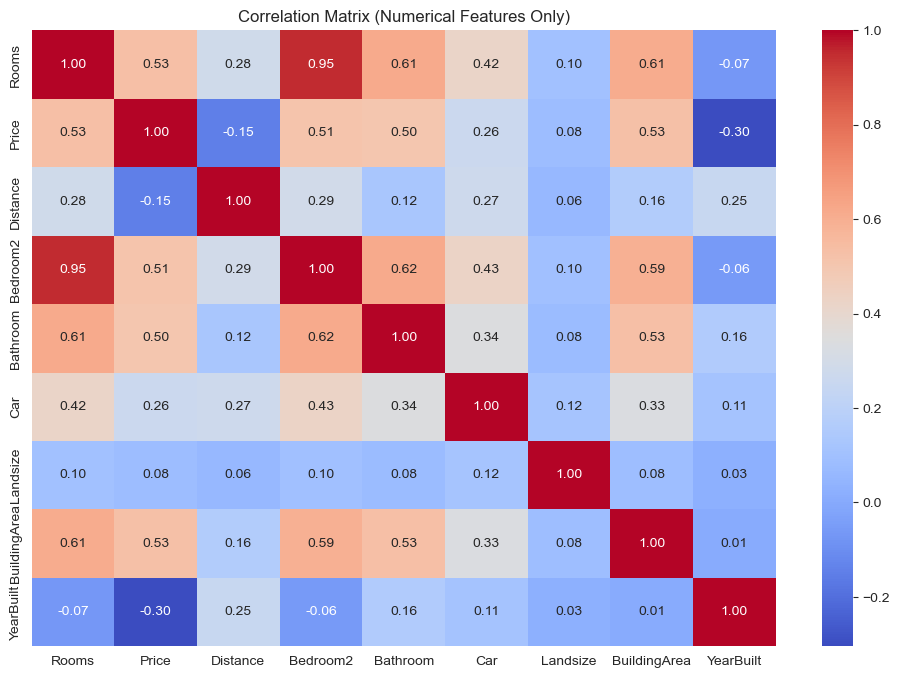

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (Numerical Features Only)")
plt.show()


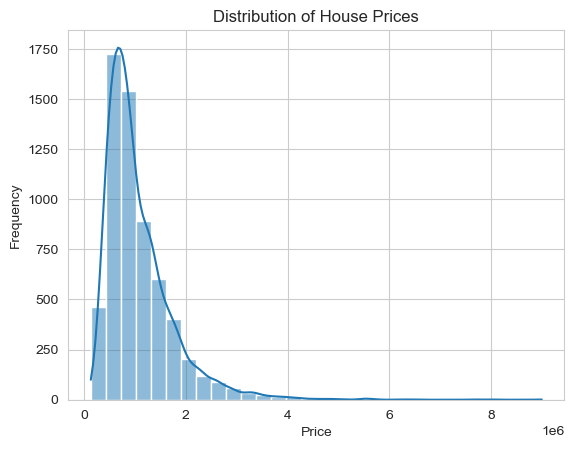

In [34]:
sns.histplot(data['Price'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


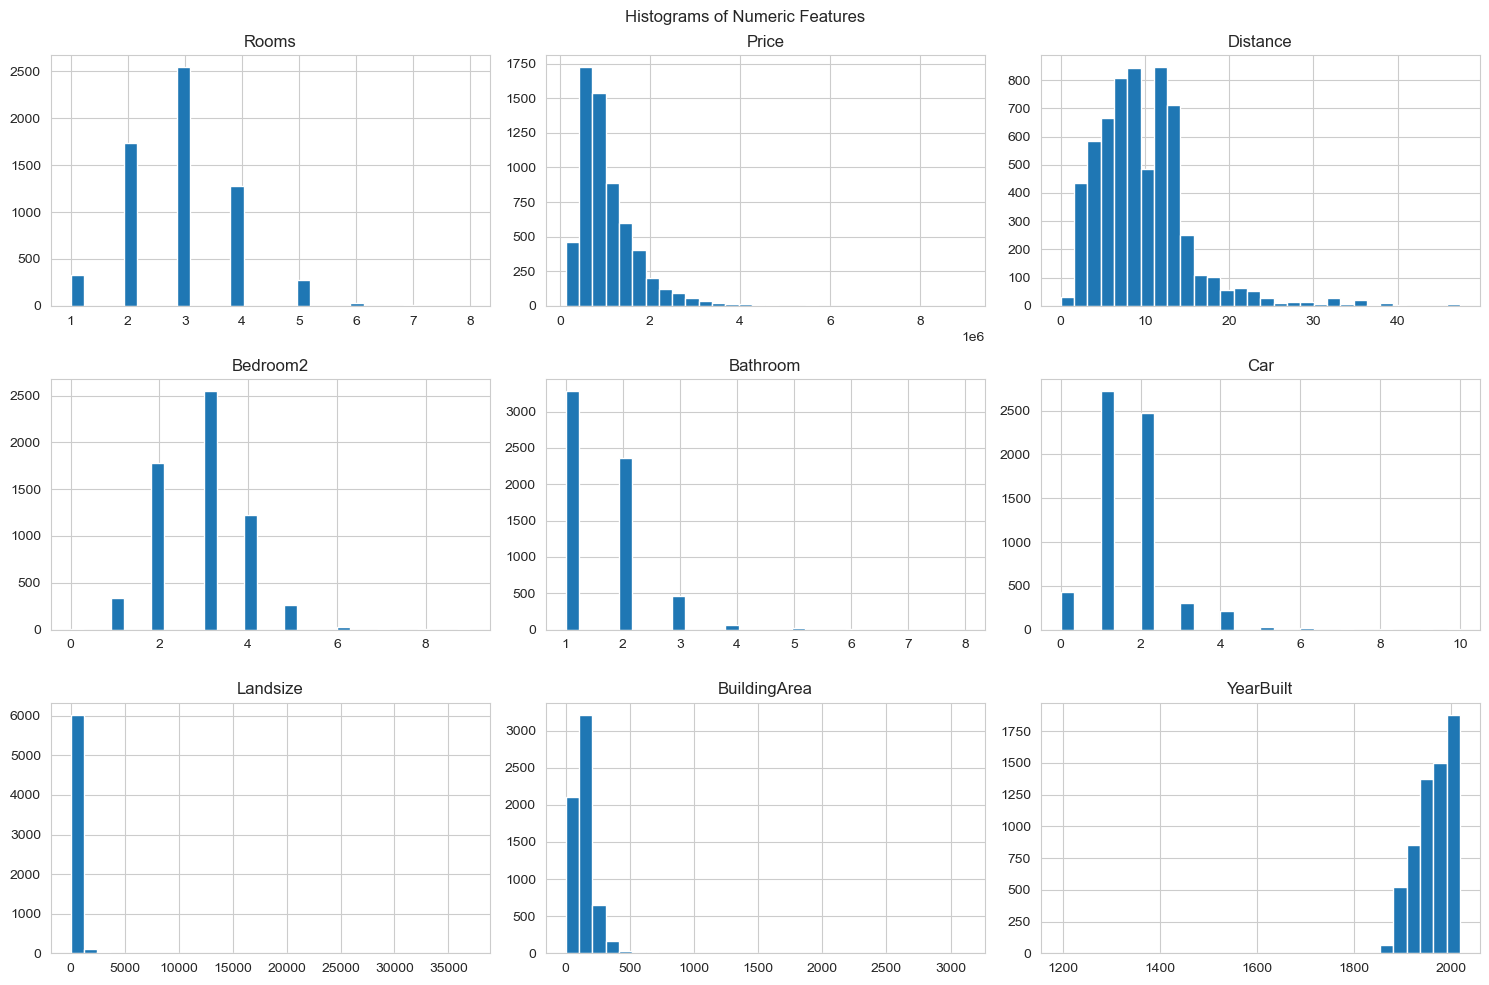

In [35]:
data.select_dtypes(include=['int64', 'float64']).hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()


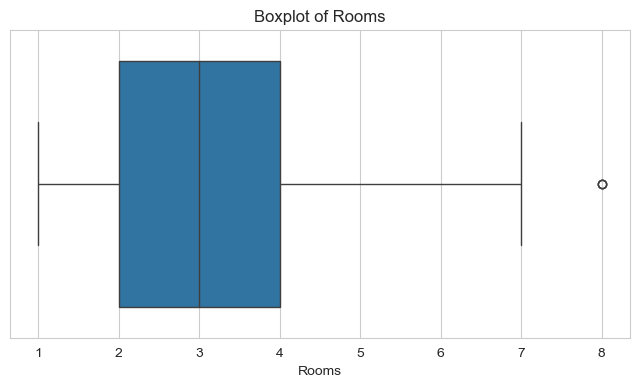

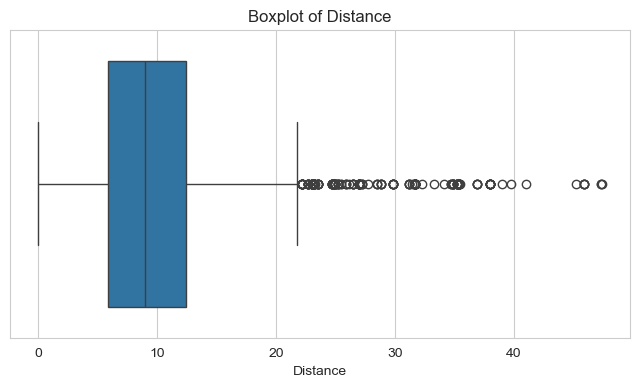

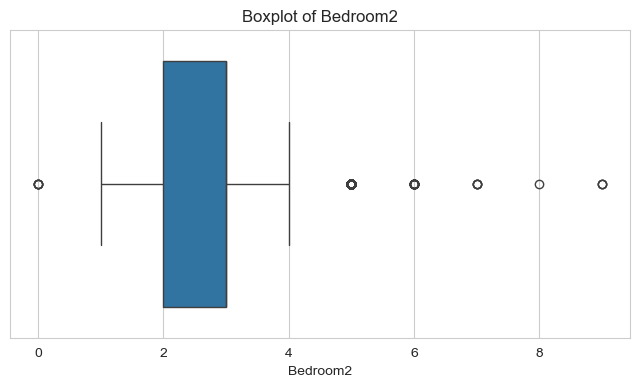

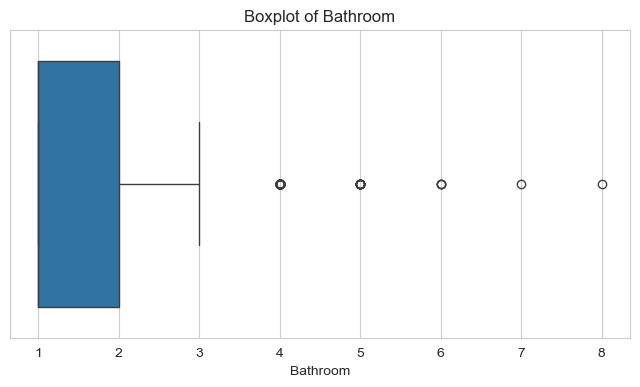

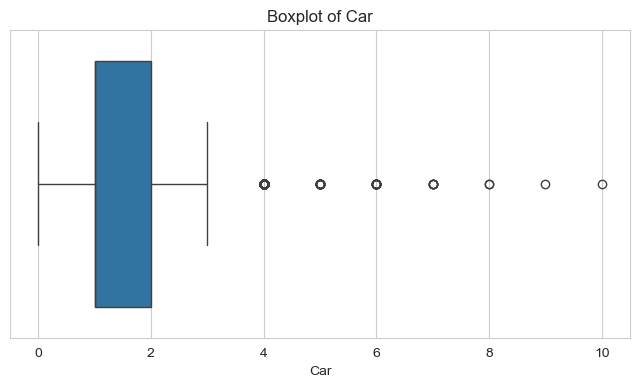

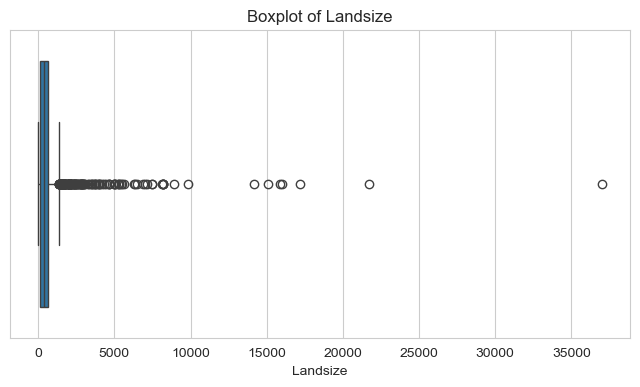

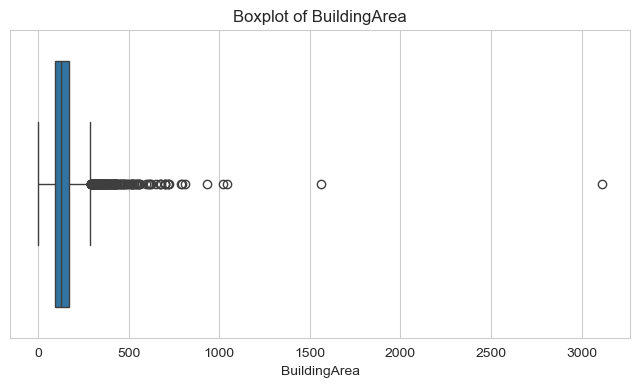

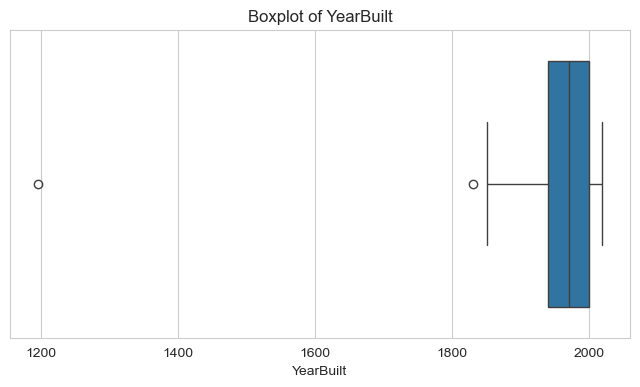

In [36]:
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.drop('Price')

for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


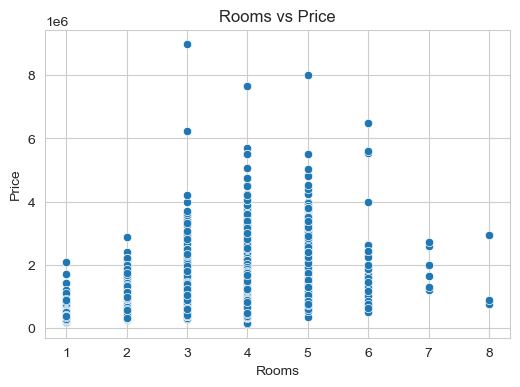

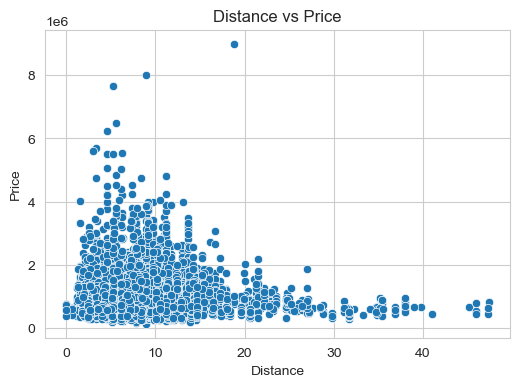

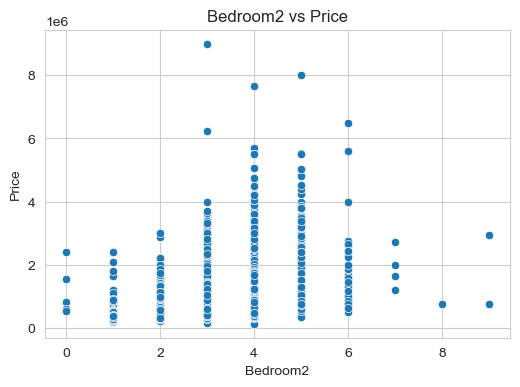

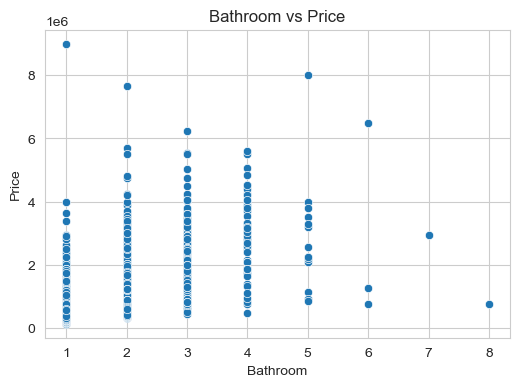

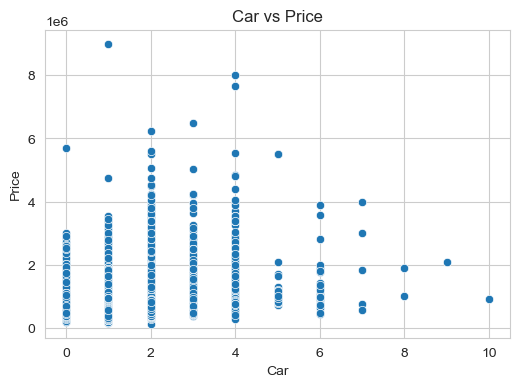

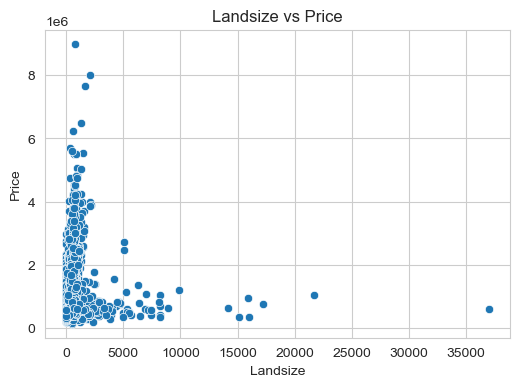

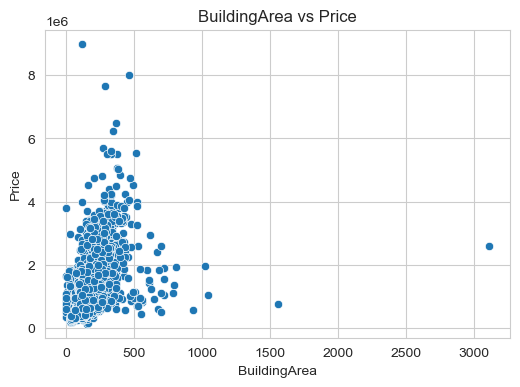

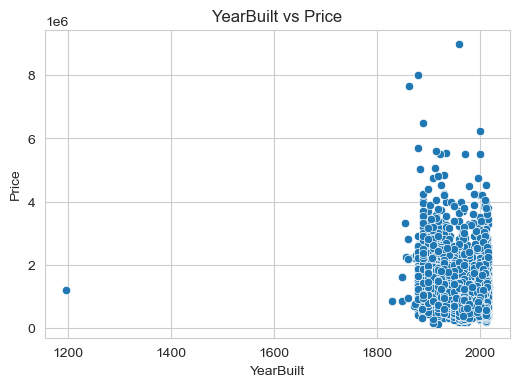

In [37]:
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data[col], y=data['Price'])
    plt.title(f"{col} vs Price")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()
